# Pruebas de hipotesis y ANOVA

In [1]:
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sb


In [2]:
inegi = pd.read_csv("./data/inegi_diff.csv")

In [3]:
len(inegi.iloc[0, :].dropna()[1:])

53

In [4]:
inegi.iloc[0, :].dropna()[1:]

2010.1    125516.558
2010.2   -142709.876
2010.3     118087.51
2011      -93685.524
2011.1     37552.336
2011.2    -67381.696
2011.3    128568.908
2012      -84187.441
2012.1     91150.853
2012.2   -131175.858
2012.3    177140.432
2013     -126746.832
2013.1    121966.925
2013.2   -146430.906
2013.3    178014.809
2014     -127516.548
2014.1    107210.694
2014.2   -130245.539
2014.3    157495.608
2015     -107882.368
2015.1     71419.788
2015.2   -137425.326
2015.3    202380.952
2016     -138959.039
2016.1     96327.417
2016.2   -117681.415
2016.3    188350.024
2017     -131699.769
2017.1     78672.755
2017.2   -142080.311
2017.3    224590.325
2018     -136108.684
2018.1     78477.883
2018.2     -168808.1
2018.3    233230.062
2019     -129078.324
2019.1     56937.616
2019.2   -153180.028
2019.3    206066.305
2020      -129393.05
2020.1     63544.307
2020.2   -111639.409
2020.3    180495.777
2021     -132501.794
2021.1    101069.267
2021.2    -163117.22
2021.3    224617.071
2022     -161

In [45]:
data = pd.read_csv('./data/HW_Datos_Jal.csv')

In [46]:
data.loc[:, "ta"] = data.loc[:, "HWES1"]
data = data.drop("HWES1", axis=1)

/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_16648/145674962.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[40878.         40878.         40913.125      ...   138.80350778
   139.22836162   139.63551322]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, "ta"] = data.loc[:, "HWES1"]


In [47]:
g11 = data[(data["sector_economico_1"] == 0) & (data["sector_economico_2"] == 1)]
g11.loc[:, "Año"] = pd.to_datetime(g11.loc[:, "Año"])
g11.loc[:, "ta"] = g11.loc[:, "ta"].astype("float")
g11.loc[:, "ta"] = g11.ta.diff().fillna(0)
g11.loc[:, "Año"] = pd.to_datetime(g11.loc[:, "Año"])

In [48]:
corr_d = pd.DataFrame(columns=["inegi", "imss"])
corr_d["inegi"] = list(map(float, inegi.iloc[0, :].dropna()[1:].values))
corr_d["imss"] =g11.groupby(pd.to_datetime(g11.loc[:, "Año"]).dt.to_period('Q'))['ta'].sum().iloc[1:-1].values


In [49]:
corr_d.corr()

,inegi,imss
inegi,1.000000,0.076656
imss,0.076656,1.000000


In [50]:
g11.groupby(pd.to_datetime(g11['Año']).dt.to_period('Q'))['ta'].sum().iloc[1:-1]

Año
2010Q2    -226.867839
2010Q3    -255.568648
2010Q4     142.879214
2011Q1     436.750101
2011Q2      -2.710396
2011Q3      17.333377
2011Q4     385.627402
2012Q1     707.113469
2012Q2     215.383288
2012Q3     114.871272
2012Q4     781.838815
2013Q1    1171.209842
2013Q2     893.369802
2013Q3     357.462267
2013Q4     865.967260
2014Q1    1344.919246
2014Q2     812.722690
2014Q3     373.892793
2014Q4    1092.924306
2015Q1    1321.365309
2015Q2     783.445292
2015Q3     138.266267
2015Q4    1190.573688
2016Q1    1436.302450
2016Q2     922.383312
2016Q3     625.266258
2016Q4    1569.333447
2017Q1    1864.452550
2017Q2    1153.387744
2017Q3     708.663967
2017Q4    1762.794668
2018Q1    2100.149430
2018Q2    1272.227150
2018Q3     713.691748
2018Q4    1690.246419
2019Q1    2248.836530
2019Q2    1447.176581
2019Q3     513.762910
2019Q4    1589.584876
2020Q1    1801.421309
2020Q2    1318.184684
2020Q3     164.455443
2020Q4    1310.606726
2021Q1    1330.542465
2021Q2     570.162194
2021Q3

In [51]:
sector_names = [
    "Industrias Agropecuaria",
    "Industrias Extractivas",
    "",
    "Industrias de Transformacion",
    "Industrias de la Construccion",
    "Ind. Electrica y Suministro Agua pot",
    "Comercio",
    "Transporte y comunicaciones",
    "Servicios para empresa, personal, hogar",
    "Servicios sociales"
]

In [52]:
data.head()

,Año,Unnamed: 0,sector_economico_1,sector_economico_2,ta
0,2010-02-28,0,0.0,1.0,40878.000000
1,2010-03-31,1,0.0,1.0,40878.000000
2,2010-04-30,2,0.0,1.0,40913.125000
3,2010-05-31,3,0.0,1.0,40804.703125
4,2010-06-30,4,0.0,1.0,40651.132161


In [53]:
selected_data = data.dropna().loc[:, ["sector_economico_1",
                                      "sector_economico_2",
                                      "ta", "Año"]]
selected_data = selected_data[selected_data["Año"] > "2010-01-31"]
selected_data.head()

,sector_economico_1,sector_economico_2,ta,Año
0,0.0,1.0,40878.000000,2010-02-28
1,0.0,1.0,40878.000000,2010-03-31
2,0.0,1.0,40913.125000,2010-04-30
3,0.0,1.0,40804.703125,2010-05-31
4,0.0,1.0,40651.132161,2010-06-30


In [54]:
selected_data.loc[(selected_data['sector_economico_2'] >= 20) &
                  (selected_data['sector_economico_2'] <= 29), 'sector_economico_1'] = 2

In [56]:
selected_data.to_csv("./data/datos_filtrados_demo.csv")


In [57]:
log_data = selected_data.copy()
log_data["ta"] = np.log(log_data["ta"])

In [58]:
# Normalidad prueba de Shapiro-Wilk
# Ho:Normalidad(p>0.05)
# H1: No normalidad (p<0.05)
# Normalidad en las variables
pg.normality(log_data, dv='ta', group='sector_economico_1')

,W,pval,normal
sector_economico_1,,,
0.0,0.901868,2.305116e-22,False
1.0,0.669216,1.145223e-29,False
2.0,0.924512,8.984192e-28,False
3.0,0.904215,1.041051e-30,False
4.0,0.870712,7.741670e-16,False
5.0,0.780885,1.542745e-20,False
6.0,0.943477,3.522393e-23,False
7.0,0.944261,1.153196e-18,False
8.0,0.938343,3.912896e-24,False


In [6]:
# Normalidad prueba de Shapiro-Wilk
# Ho:Normalidad(p>0.05)
# H1: No normalidad (p<0.05)
# Normalidad en las variables
pg.normality(selected_data, dv='ta', group='sector_economico_2')

/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
 

/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/luis/.pyenv/versions/3.11.2/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
 

,W,pval,normal
sector_economico_2,,,
1.0,0.195570,0.000000e+00,False
2.0,0.339022,0.000000e+00,False
20.0,0.395142,0.000000e+00,False
21.0,0.404577,0.000000e+00,False
23.0,0.363914,0.000000e+00,False
...,...,...,...
72.0,0.520264,0.000000e+00,False
99.0,0.600730,0.000000e+00,False
14.0,0.443303,4.063766e-43,False


In [7]:
# Varianza entre grupos      
# Homocedasticidad prueba de Levene (sin normalidad)
# Ho:Homocedasticidad (p>0.05)
# H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(selected_data, dv='ta', group='sector_economico_1', method='levene')

,W,pval,equal_var
levene,66400.230757,0.0,False


In [8]:
# Varianza entre grupos      
# Homocedasticidad prueba de Levene (sin normalidad)
# Ho:Homocedasticidad (p>0.05)
# H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(selected_data, dv='ta', group='sector_economico_2', method='levene')

,W,pval,equal_var
levene,31063.313635,0.0,False


In [9]:
# Homocedasticidad prueba de Bartlett (con normalidad)
# Ho:Homocedasticidad (p>0.05)
# H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(selected_data, dv='ta', group='sector_economico_1', method='bartlett')

,T,pval,equal_var
bartlett,4.141916e+07,0.0,False


In [10]:
# Homocedasticidad prueba de Bartlett (con normalidad)
# Ho:Homocedasticidad (p>0.05)
# H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(selected_data, dv='ta', group='sector_economico_2', method='bartlett')

,T,pval,equal_var
bartlett,7.541673e+07,0.0,False


In [61]:
def get_sector_data_covars(data: pd.DataFrame):
    data = data.copy()
    
    # Main sector data
    sector_data = data.groupby(["Año", "sector_economico_1"])\
        .sum() \
        .reset_index() \
        .drop("sector_economico_2", axis=1) \
        .sort_values(by=["sector_economico_1", "Año"])
    
    # Groups data
    grouped_data = data.groupby(["Año", "sector_economico_1", "sector_economico_2"])\
        .sum() \
        .reset_index()
        
    # Return data
    ret_data = sector_data.copy()
    
    # print(ret_data)
    
    sectors_set = sorted(set(sector_data.sector_economico_1))

    # Adding for each sector
    for sector in sectors_set:
        groups_set = sorted(set(grouped_data[(grouped_data["sector_economico_1"] == sector)]["sector_economico_2"]))
        for group in groups_set:
            employments_per_group = grouped_data[(grouped_data["sector_economico_1"] == sector) &
                                                 (grouped_data["sector_economico_2"] == group)]["ta"]
            try:
                covar_col = list(employments_per_group.values) * 10
                ret_data[f"covar_s{int(sector)}_g{int(group)}"] = covar_col
            except Exception as e:
                print(f"Skipping sector {sector_names[int(sector)]} group {group}, it does not contain the same amount of rows: {len(employments_per_group)}")
                
    return ret_data

In [62]:
sector_df = get_sector_data_covars(selected_data)
covars = list(sector_df.columns)[3:]

In [16]:
sector_df

,Año,sector_economico_1,ta,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
0,2010-02-28,0.0,57171.000000,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
10,2010-03-31,0.0,57171.000000,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
20,2010-04-30,0.0,57208.791667,40913.125000,15525.333333,450.875000,313.458333,6.000000,1382.750000,5.000000,...,3921.583333,21871.125000,33609.541667,11839.750000,35782.000000,39928.958333,17681.833333,5352.000000,162521.125000,117.041667
30,2010-05-31,0.0,57107.425347,40804.703125,15529.986111,453.130208,313.605903,6.000000,1381.302083,5.000000,...,3917.392361,21846.286458,33596.269097,11840.802083,35773.958333,39885.668403,17716.506944,5363.666667,162551.744792,117.164931
40,2010-06-30,0.0,56960.699291,40651.132161,15537.486690,451.749783,314.330657,6.000000,1380.622830,5.000000,...,3918.001013,21815.191189,33585.549552,11846.351997,35774.001736,39829.848886,17754.069155,5371.222222,162607.922092,117.283058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2023-03-31,9.0,273669.743647,89530.457437,22528.066853,434.680343,509.319634,42.073018,1446.215281,15.041679,...,6140.205500,30786.473565,50523.641274,17944.434183,47863.085964,47444.122317,30811.080943,5889.546765,189386.876760,138.116863
1589,2023-04-30,9.0,274092.587662,89898.480044,22589.105735,437.193662,498.889649,42.361643,1449.372978,14.998276,...,6179.863604,30984.662167,50755.656221,18064.166092,47975.457382,47542.450553,30990.994237,5885.190650,189535.548561,138.403660
1599,2023-05-31,9.0,274502.188176,90125.501709,22646.517996,439.268926,488.602581,42.596574,1451.815770,15.040015,...,6219.035954,31180.051243,50993.712211,18181.200838,48112.271658,47620.848447,31175.202810,5877.349373,189689.984038,138.803508
1609,2023-06-30,9.0,274885.597002,90293.480804,22698.413079,442.007721,478.744140,42.821717,1456.365113,15.121681,...,6253.242789,31378.132441,51254.557536,18301.275803,48229.177006,47678.771428,31357.361027,5868.876482,189841.359703,139.228362


### ANOVA

In [41]:
model = ols('tp ~ C(sector_economico_1)', data=sector_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                             sum_sq      df            F  PR(>F)
C(sector_economico_1)  2.451810e+13     8.0  3646.747421     0.0
Residual               1.225317e+12  1458.0          NaN     NaN


### ANOVA 2

In [1]:
model = ols('tp ~ C(sector_economico_1) + C(sector_economico_2) + C(sector_economico_1) * C(sector_economico_2)', data=selected_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

NameError: name 'ols' is not defined

### Post Hoc Tukey

In [43]:
# Prueba de Tukey
comp = MultiComparison(sector_df['tp'], sector_df['sector_economico_1'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
   0.0    1.0  -54814.6687    0.0  -64790.0019  -44839.3355   True
   0.0    3.0   291629.319    0.0  281653.9858  301604.6522   True
   0.0    4.0   23861.9632    0.0     13886.63   33837.2964   True
   0.0    5.0  -49387.9387    0.0  -59363.2719  -39412.6054   True
   0.0    6.0  238674.3006    0.0  228698.9674  248649.6338   True
   0.0    7.0   12299.7914 0.0042    2324.4582   22275.1246   True
   0.0    8.0  229317.5153    0.0  219342.1821  239292.8485   True
   0.0    9.0  189495.8957    0.0  179520.5625  199471.2289   True
   1.0    3.0  346443.9877    0.0  336468.6545  356419.3209   True
   1.0    4.0   78676.6319    0.0   68701.2987   88651.9651   True
   1.0    5.0    5426.7301 0.7529   -4548.6031   15402.0633  False
   1.0    6.0  293488.9693    0.0  283513.6361  303464.3025   

In [44]:
print(sector_names[0], "-" ,sector_names[7])
print(sector_names[1], "-" ,sector_names[5])
print(sector_names[4], "-" ,sector_names[7])
print(sector_names[6], "-" ,sector_names[8])

Industrias Agropecuaria - Servicios para empresa, personal, hogar
Industrias Extractivas - Comercio
Ind. Electrica y Suministro Agua pot - Servicios para empresa, personal, hogar
Transporte y comunicaciones - Servicios sociales


### ANCOVA

In [45]:
ancova_res = pg.ancova(data=sector_df, dv='tp', covar=covars, between='sector_economico_1')
ancova_res

,Source,SS,DF,F,p-unc,np2
0,sector_economico_1,2.451810e+13,8,7.831518e+03,0.000000,9.781886e-01
1,covar_s0_g1,1.573496e+07,1,4.020823e-02,0.841103,2.878101e-05
2,covar_s0_g2,1.142041e+06,1,2.918305e-03,0.956926,2.088976e-06
3,covar_s0_g3,4.936843e+03,1,1.261533e-05,0.997167,9.030298e-09
4,covar_s0_g4,9.476044e+04,1,2.421454e-04,0.987587,1.733324e-07
...,...,...,...,...,...,...
58,covar_s9_g92,5.055710e+05,1,1.291907e-03,0.971333,9.247717e-07
59,covar_s9_g93,1.931689e+05,1,4.936126e-04,0.982278,3.533375e-07
60,covar_s9_g94,1.446645e+07,1,3.696673e-02,0.847561,2.646081e-05
61,covar_s9_g99,7.659849e+01,1,1.957354e-07,0.999647,1.401112e-10


### CORR

In [17]:
sector_df

,Año,sector_economico_1,ta,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
0,2010-02-28,0.0,57171.000000,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
10,2010-03-31,0.0,57171.000000,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
20,2010-04-30,0.0,57208.791667,40913.125000,15525.333333,450.875000,313.458333,6.000000,1382.750000,5.000000,...,3921.583333,21871.125000,33609.541667,11839.750000,35782.000000,39928.958333,17681.833333,5352.000000,162521.125000,117.041667
30,2010-05-31,0.0,57107.425347,40804.703125,15529.986111,453.130208,313.605903,6.000000,1381.302083,5.000000,...,3917.392361,21846.286458,33596.269097,11840.802083,35773.958333,39885.668403,17716.506944,5363.666667,162551.744792,117.164931
40,2010-06-30,0.0,56960.699291,40651.132161,15537.486690,451.749783,314.330657,6.000000,1380.622830,5.000000,...,3918.001013,21815.191189,33585.549552,11846.351997,35774.001736,39829.848886,17754.069155,5371.222222,162607.922092,117.283058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2023-03-31,9.0,273669.743647,89530.457437,22528.066853,434.680343,509.319634,42.073018,1446.215281,15.041679,...,6140.205500,30786.473565,50523.641274,17944.434183,47863.085964,47444.122317,30811.080943,5889.546765,189386.876760,138.116863
1589,2023-04-30,9.0,274092.587662,89898.480044,22589.105735,437.193662,498.889649,42.361643,1449.372978,14.998276,...,6179.863604,30984.662167,50755.656221,18064.166092,47975.457382,47542.450553,30990.994237,5885.190650,189535.548561,138.403660
1599,2023-05-31,9.0,274502.188176,90125.501709,22646.517996,439.268926,488.602581,42.596574,1451.815770,15.040015,...,6219.035954,31180.051243,50993.712211,18181.200838,48112.271658,47620.848447,31175.202810,5877.349373,189689.984038,138.803508
1609,2023-06-30,9.0,274885.597002,90293.480804,22698.413079,442.007721,478.744140,42.821717,1456.365113,15.121681,...,6253.242789,31378.132441,51254.557536,18301.275803,48229.177006,47678.771428,31357.361027,5868.876482,189841.359703,139.228362


In [18]:
corr = sector_df.iloc[:, 3:].corr()
corr

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,1.000000,0.962979,-0.004892,0.574307,0.989802,0.142788,0.867012,0.321440,0.998487,0.932927,...,0.975424,0.983306,0.974099,0.935834,0.954775,0.930495,0.975619,0.236578,0.972898,0.875621
covar_s0_g2,0.962979,1.000000,-0.256171,0.735483,0.978890,0.157843,0.912940,0.104263,0.961262,0.978237,...,0.986832,0.946190,0.895374,0.823694,0.852518,0.810657,0.975611,0.001883,0.893269,0.821751
covar_s0_g3,-0.004892,-0.256171,1.000000,-0.729535,-0.108839,-0.037850,-0.334797,0.845240,-0.001194,-0.285776,...,-0.176088,0.032322,0.165028,0.306388,0.273596,0.317722,-0.130201,0.877506,0.172603,0.108005
covar_s0_g4,0.574307,0.735483,-0.729535,1.000000,0.658020,0.078267,0.711655,-0.505015,0.580174,0.778077,...,0.660726,0.503110,0.391067,0.263566,0.329130,0.249108,0.693522,-0.525995,0.414027,0.523373
covar_s0_g5,0.989802,0.978890,-0.108839,0.658020,1.000000,0.105692,0.887218,0.204291,0.991470,0.954170,...,0.984122,0.966702,0.945884,0.889821,0.914116,0.885882,0.981217,0.118568,0.936523,0.861176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,0.930495,0.810657,0.317722,0.249108,0.885882,0.076937,0.721484,0.579180,0.925748,0.753979,...,0.867599,0.937824,0.983227,0.991596,0.981102,1.000000,0.841739,0.491886,0.961270,0.797590
covar_s9_g92,0.975619,0.975611,-0.130201,0.693522,0.981217,0.242396,0.858378,0.198143,0.980275,0.981357,...,0.960643,0.957284,0.915183,0.864686,0.895434,0.841739,1.000000,0.132156,0.926100,0.880748
covar_s9_g93,0.236578,0.001883,0.877506,-0.525995,0.118568,0.195655,-0.094079,0.955487,0.238195,-0.033689,...,0.053584,0.255687,0.363539,0.508947,0.489863,0.491886,0.132156,1.000000,0.440586,0.388404
covar_s9_g94,0.972898,0.893269,0.172603,0.414027,0.936523,0.192537,0.773513,0.519875,0.971609,0.849936,...,0.911557,0.960867,0.975206,0.972002,0.988393,0.961270,0.926100,0.440586,1.000000,0.896065


In [19]:
corr

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,1.000000,0.962979,-0.004892,0.574307,0.989802,0.142788,0.867012,0.321440,0.998487,0.932927,...,0.975424,0.983306,0.974099,0.935834,0.954775,0.930495,0.975619,0.236578,0.972898,0.875621
covar_s0_g2,0.962979,1.000000,-0.256171,0.735483,0.978890,0.157843,0.912940,0.104263,0.961262,0.978237,...,0.986832,0.946190,0.895374,0.823694,0.852518,0.810657,0.975611,0.001883,0.893269,0.821751
covar_s0_g3,-0.004892,-0.256171,1.000000,-0.729535,-0.108839,-0.037850,-0.334797,0.845240,-0.001194,-0.285776,...,-0.176088,0.032322,0.165028,0.306388,0.273596,0.317722,-0.130201,0.877506,0.172603,0.108005
covar_s0_g4,0.574307,0.735483,-0.729535,1.000000,0.658020,0.078267,0.711655,-0.505015,0.580174,0.778077,...,0.660726,0.503110,0.391067,0.263566,0.329130,0.249108,0.693522,-0.525995,0.414027,0.523373
covar_s0_g5,0.989802,0.978890,-0.108839,0.658020,1.000000,0.105692,0.887218,0.204291,0.991470,0.954170,...,0.984122,0.966702,0.945884,0.889821,0.914116,0.885882,0.981217,0.118568,0.936523,0.861176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,0.930495,0.810657,0.317722,0.249108,0.885882,0.076937,0.721484,0.579180,0.925748,0.753979,...,0.867599,0.937824,0.983227,0.991596,0.981102,1.000000,0.841739,0.491886,0.961270,0.797590
covar_s9_g92,0.975619,0.975611,-0.130201,0.693522,0.981217,0.242396,0.858378,0.198143,0.980275,0.981357,...,0.960643,0.957284,0.915183,0.864686,0.895434,0.841739,1.000000,0.132156,0.926100,0.880748
covar_s9_g93,0.236578,0.001883,0.877506,-0.525995,0.118568,0.195655,-0.094079,0.955487,0.238195,-0.033689,...,0.053584,0.255687,0.363539,0.508947,0.489863,0.491886,0.132156,1.000000,0.440586,0.388404
covar_s9_g94,0.972898,0.893269,0.172603,0.414027,0.936523,0.192537,0.773513,0.519875,0.971609,0.849936,...,0.911557,0.960867,0.975206,0.972002,0.988393,0.961270,0.926100,0.440586,1.000000,0.896065


In [20]:
upper_corr = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool))
correlated_cols = [col for col in upper_corr.columns if any(upper_corr[col] < 0.5)]

In [21]:
corr.abs() >= 0.5

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,True,True,False,True,True,False,True,False,True,True,...,True,True,True,True,True,True,True,False,True,True
covar_s0_g2,True,True,False,True,True,False,True,False,True,True,...,True,True,True,True,True,True,True,False,True,True
covar_s0_g3,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
covar_s0_g4,True,True,True,True,True,False,True,True,True,True,...,True,True,False,False,False,False,True,True,False,True
covar_s0_g5,True,True,False,True,True,False,True,False,True,True,...,True,True,True,True,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,True,True,False,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
covar_s9_g92,True,True,False,True,True,False,True,False,True,True,...,True,True,True,True,True,True,True,False,True,True
covar_s9_g93,False,False,True,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
covar_s9_g94,True,True,False,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True


In [22]:
sector_df

,Año,sector_economico_1,ta,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
0,2010-02-28,0.0,57171.000000,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
10,2010-03-31,0.0,57171.000000,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
20,2010-04-30,0.0,57208.791667,40913.125000,15525.333333,450.875000,313.458333,6.000000,1382.750000,5.000000,...,3921.583333,21871.125000,33609.541667,11839.750000,35782.000000,39928.958333,17681.833333,5352.000000,162521.125000,117.041667
30,2010-05-31,0.0,57107.425347,40804.703125,15529.986111,453.130208,313.605903,6.000000,1381.302083,5.000000,...,3917.392361,21846.286458,33596.269097,11840.802083,35773.958333,39885.668403,17716.506944,5363.666667,162551.744792,117.164931
40,2010-06-30,0.0,56960.699291,40651.132161,15537.486690,451.749783,314.330657,6.000000,1380.622830,5.000000,...,3918.001013,21815.191189,33585.549552,11846.351997,35774.001736,39829.848886,17754.069155,5371.222222,162607.922092,117.283058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2023-03-31,9.0,273669.743647,89530.457437,22528.066853,434.680343,509.319634,42.073018,1446.215281,15.041679,...,6140.205500,30786.473565,50523.641274,17944.434183,47863.085964,47444.122317,30811.080943,5889.546765,189386.876760,138.116863
1589,2023-04-30,9.0,274092.587662,89898.480044,22589.105735,437.193662,498.889649,42.361643,1449.372978,14.998276,...,6179.863604,30984.662167,50755.656221,18064.166092,47975.457382,47542.450553,30990.994237,5885.190650,189535.548561,138.403660
1599,2023-05-31,9.0,274502.188176,90125.501709,22646.517996,439.268926,488.602581,42.596574,1451.815770,15.040015,...,6219.035954,31180.051243,50993.712211,18181.200838,48112.271658,47620.848447,31175.202810,5877.349373,189689.984038,138.803508
1609,2023-06-30,9.0,274885.597002,90293.480804,22698.413079,442.007721,478.744140,42.821717,1456.365113,15.121681,...,6253.242789,31378.132441,51254.557536,18301.275803,48229.177006,47678.771428,31357.361027,5868.876482,189841.359703,139.228362


In [23]:
covars_df = sector_df.iloc[:162, 3:]
covars_df

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
0,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,756.000000,61750.000000,16282.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
10,40878.000000,15525.000000,448.000000,314.000000,6.000000,1383.000000,5.000000,756.000000,61750.000000,16282.000000,...,3926.000000,21884.000000,33623.000000,11836.000000,35783.000000,39956.000000,17662.000000,5346.000000,162505.000000,117.000000
20,40913.125000,15525.333333,450.875000,313.458333,6.000000,1382.750000,5.000000,757.666667,61762.583333,16289.583333,...,3921.583333,21871.125000,33609.541667,11839.750000,35782.000000,39928.958333,17681.833333,5352.000000,162521.125000,117.041667
30,40804.703125,15529.986111,453.130208,313.605903,6.000000,1381.302083,5.000000,760.472222,61759.434028,16282.392361,...,3917.392361,21846.286458,33596.269097,11840.802083,35773.958333,39885.668403,17716.506944,5363.666667,162551.744792,117.164931
40,40651.132161,15537.486690,451.749783,314.330657,6.000000,1380.622830,5.000000,762.327546,61730.332610,16296.167679,...,3918.001013,21815.191189,33585.549552,11846.351997,35774.001736,39829.848886,17754.069155,5371.222222,162607.922092,117.283058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,89530.457437,22528.066853,434.680343,509.319634,42.073018,1446.215281,15.041679,1166.736184,99267.840809,23104.223307,...,6140.205500,30786.473565,50523.641274,17944.434183,47863.085964,47444.122317,30811.080943,5889.546765,189386.876760,138.116863
1580,89898.480044,22589.105735,437.193662,498.889649,42.361643,1449.372978,14.998276,1157.122176,99604.514108,23285.255669,...,6179.863604,30984.662167,50755.656221,18064.166092,47975.457382,47542.450553,30990.994237,5885.190650,189535.548561,138.403660
1590,90125.501709,22646.517996,439.268926,488.602581,42.596574,1451.815770,15.040015,1147.492086,99919.034354,23465.536683,...,6219.035954,31180.051243,50993.712211,18181.200838,48112.271658,47620.848447,31175.202810,5877.349373,189689.984038,138.803508
1600,90293.480804,22698.413079,442.007721,478.744140,42.821717,1456.365113,15.121681,1137.888249,100217.532922,23632.347654,...,6253.242789,31378.132441,51254.557536,18301.275803,48229.177006,47678.771428,31357.361027,5868.876482,189841.359703,139.228362


In [24]:
coeffs_df = pd.DataFrame(columns=covars_df.columns)

for c in covars_df.columns:
    X = covars_df.drop(c, axis=1)
    y = covars_df[c]
    X = sm.add_constant(X)
    mod = sm.OLS(y, X)
    res = mod.fit_regularized()
    const = res.params.const
    coef_series = res.params.drop("const")
    coef_series[c] = const
    coef_series.name = c
    coeffs_df = coeffs_df.append(coef_series, sort=True)

/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeffs_df = coeffs_df.append(coef_series, sort=True)
/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeffs_df = coeffs_df.append(coef_series, sort=True)
/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeffs_df = coeffs_df.append(coef_series, sort=True)
/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeffs_df = coeffs_df.append(coef_series, sort=True)
/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeffs_df = coeffs_df.append(coef_series, sort=True)
/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coeffs_df = coeffs_df.append(coef_series, sort=True)
/var/folders/_w/_rk_yvg13819jy3bf_5jck6w0000gn/T/ipykernel_57970/3944073916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

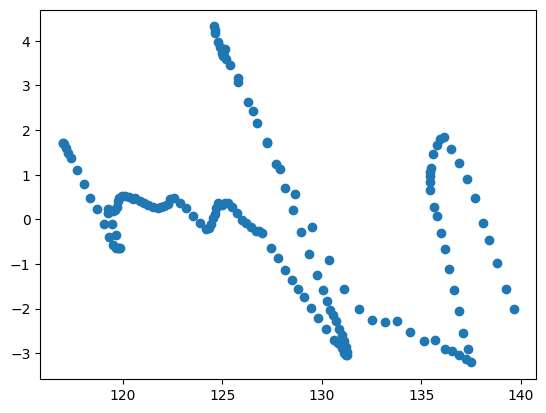

In [25]:
er = res.predict(X) - y
plt.scatter(y, er)

In [26]:
coeffs_df

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,60259.249098,0.173001,-3.827673,-3.062745,621.914672,-8.226210,314.560722,3.048369,-0.046280,-0.088673,...,0.015414,0.009803,0.019338,0.016371,-0.018651,-0.014522,0.040648,-0.085941,-0.004444,-3.032327
covar_s0_g2,0.016808,17960.411944,-2.644416,2.693786,60.297486,-1.129978,64.980354,-0.015372,-0.002264,-0.000200,...,0.051334,-0.003958,-0.001228,-0.003405,-0.001115,-0.002948,0.013389,-0.069717,0.000958,-0.730983
covar_s0_g3,-0.000026,-0.000580,463.848170,-0.119206,1.160594,0.015955,-2.205729,0.033051,-0.000337,-0.000342,...,-0.001128,0.000300,0.000096,0.000332,-0.000070,0.000013,-0.000400,0.002821,-0.000072,0.023041
covar_s0_g4,-0.000014,0.001427,-0.163182,279.060954,4.084992,-0.017413,1.643056,-0.104916,0.001573,0.001464,...,0.001935,-0.000788,-0.000484,-0.000790,0.000690,-0.000092,0.002027,-0.008882,0.000174,0.118623
covar_s0_g5,0.000116,-0.000223,-0.005661,0.010551,17.909151,-0.002399,0.270012,0.000346,0.000021,-0.000112,...,0.000003,-0.000018,0.000022,-0.000021,-0.000011,-0.000014,0.000057,-0.000397,0.000000,0.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,0.021787,-0.063078,1.106710,-8.667175,164.676304,-0.907576,42.007274,1.044361,-0.016602,-0.025738,...,-0.030709,0.006154,0.008027,0.009801,-0.009059,44118.103838,-0.017584,0.079965,-0.002119,-1.215677
covar_s9_g92,0.030048,-0.051476,-1.885321,4.916268,93.216118,-2.088359,19.604434,0.437255,-0.000733,-0.000717,...,0.076814,0.005670,-0.001670,0.003962,-0.002872,-0.005999,21906.815538,0.023131,-0.000360,0.112211
covar_s9_g93,0.001345,-0.008509,0.531196,-1.715370,8.969191,0.115835,-4.178187,0.441527,-0.006878,-0.004456,...,-0.007540,0.003311,0.000586,0.006349,-0.000686,-0.000891,0.000344,6027.924900,0.000018,0.394409
covar_s9_g94,0.071047,-0.153640,-1.430334,-6.191520,318.706338,-3.330228,99.075110,4.086887,-0.061939,-0.062220,...,-0.008974,0.010113,0.009554,0.034325,-0.009233,-0.014503,0.027484,0.098169,176734.084311,-8.876750


In [27]:
standarized_coeffs = coeffs_df.apply(lambda x: x / x.abs().sum(), axis=1)
standarized_coeffs

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,9.840963e-01,2.825282e-06,-0.000063,-0.000050,0.010157,-0.000134,0.005137,4.978304e-05,-7.557931e-07,-1.448119e-06,...,2.517317e-07,1.601005e-07,3.158113e-07,2.673621e-07,-3.045974e-07,-2.371567e-07,6.638278e-07,-1.403507e-06,-7.257813e-08,-0.000050
covar_s0_g2,9.289013e-07,9.925830e-01,-0.000146,0.000149,0.003332,-0.000062,0.003591,-8.495286e-07,-1.251431e-07,-1.103226e-08,...,2.836958e-06,-2.187577e-07,-6.788033e-08,-1.881922e-07,-6.163171e-08,-1.629318e-07,7.399708e-07,-3.852915e-06,5.291855e-08,-0.000040
covar_s0_g3,-5.474493e-08,-1.241722e-06,0.992274,-0.000255,0.002483,0.000034,-0.004719,7.070397e-05,-7.212906e-07,-7.308376e-07,...,-2.413019e-06,6.422801e-07,2.048886e-07,7.110022e-07,-1.499195e-07,2.777221e-08,-8.549892e-07,6.035315e-06,-1.539803e-07,0.000049
covar_s0_g4,-4.870939e-08,4.996106e-06,-0.000571,0.977026,0.014302,-0.000061,0.005753,-3.673243e-04,5.508394e-06,5.125784e-06,...,6.775397e-06,-2.758150e-06,-1.695350e-06,-2.766661e-06,2.416916e-06,-3.224453e-07,7.097413e-06,-3.109763e-05,6.074606e-07,0.000415
covar_s0_g5,6.357597e-06,-1.221925e-05,-0.000311,0.000579,0.982596,-0.000132,0.014814,1.895945e-05,1.152501e-06,-6.141640e-06,...,1.379763e-07,-9.728356e-07,1.194806e-06,-1.160653e-06,-5.888811e-07,-7.545284e-07,3.122108e-06,-2.178617e-05,0.000000e+00,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,4.913323e-07,-1.422481e-06,0.000025,-0.000195,0.003714,-0.000020,0.000947,2.355159e-05,-3.743936e-07,-5.804236e-07,...,-6.925265e-07,1.387899e-07,1.810259e-07,2.210157e-07,-2.042908e-07,9.949157e-01,-3.965464e-07,1.803311e-06,-4.779074e-08,-0.000027
covar_s9_g92,1.363566e-06,-2.335987e-06,-0.000086,0.000223,0.004230,-0.000095,0.000890,1.984254e-05,-3.326005e-08,-3.251547e-08,...,3.485805e-06,2.572834e-07,-7.576928e-08,1.798032e-07,-1.303294e-07,-2.722158e-07,9.941262e-01,1.049660e-06,-1.632674e-08,0.000005
covar_s9_g93,2.224529e-07,-1.407341e-06,0.000088,-0.000284,0.001484,0.000019,-0.000691,7.302890e-05,-1.137706e-06,-7.370085e-07,...,-1.247073e-06,5.476783e-07,9.693801e-08,1.050138e-06,-1.134784e-07,-1.474263e-07,5.691694e-08,9.970232e-01,2.993820e-09,0.000065
covar_s9_g94,4.009587e-07,-8.670774e-07,-0.000008,-0.000035,0.001799,-0.000019,0.000559,2.306467e-05,-3.495590e-07,-3.511436e-07,...,-5.064531e-08,5.707416e-08,5.391701e-08,1.937149e-07,-5.210784e-08,-8.185007e-08,1.551054e-07,5.540265e-07,9.974129e-01,-0.000050


In [28]:
# standarized_coeffs.to_csv("./standarized_coeffs.csv")

In [46]:
cat_names = pd.read_csv("./Clasificacion_IMSS.csv", skiprows=1)\
    .loc[:, ["sector_economico_1", "sector_economico_2", "descripción sector_economico_2"]]
cat_names.head()

,sector_economico_1,sector_economico_2,descripción sector_economico_2
0,0,1,AGRICULTURA
1,0,2,GANADERIA
2,0,3,SILVICULTURA
3,0,4,PESCA
4,0,5,CAZA


In [47]:
cat_names[cat_names["sector_economico_2"] == 1]

,sector_economico_1,sector_economico_2,descripción sector_economico_2
0,0,1,AGRICULTURA
5,1,1,EXTRACCION BENEF. DE CARBON MINERAL GRAFITO EX...
10,2,1,ELABORACION DE BEBIDAS
20,3,1,REFINACION DEL PETROLEO Y DERIVADOS DEL CARBON...
29,4,1,CONSTRUCCION DE EDIFICACIONES Y DE OBRAS DE IN...
32,5,1,CAPTACION Y SUMINISTRO DE AGUA POTABLE Y TRATADA
33,6,1,"COMPRAVENTA DE ALIMENTOS, BEBIDAS Y PROD. DEL ..."
42,7,1,TRANSPORTE TERRESTRE
48,8,1,"SERV. FINANC. Y DE SEGUROS (BANCOS, FINANCIERA..."
57,9,1,"SERVS.DE ENSENANZA,INVEST.CIENT.Y DIFUSION CUL..."


In [48]:
cat_names

,sector_economico_1,sector_economico_2,descripción sector_economico_2
0,0,1,AGRICULTURA
1,0,2,GANADERIA
2,0,3,SILVICULTURA
3,0,4,PESCA
4,0,5,CAZA
...,...,...,...
57,9,1,"SERVS.DE ENSENANZA,INVEST.CIENT.Y DIFUSION CUL..."
58,9,2,"SERVICIOS MEDICOS,ASISTENCIA SOCIAL Y VETERINA..."
59,9,3,"AGRUP.MERC.,PROF.CIVICAS,POLITICAS,LABOR Y RELIG."
60,9,4,SERVICIOS DE ADMINISTRACION PUBLICA Y SEGURIDA...


In [49]:
standarized_coeffs

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,9.840963e-01,2.825282e-06,-0.000063,-0.000050,0.010157,-0.000134,0.005137,4.978304e-05,-7.557931e-07,-1.448119e-06,...,2.517317e-07,1.601005e-07,3.158113e-07,2.673621e-07,-3.045974e-07,-2.371567e-07,6.638278e-07,-1.403507e-06,-7.257813e-08,-0.000050
covar_s0_g2,9.289013e-07,9.925830e-01,-0.000146,0.000149,0.003332,-0.000062,0.003591,-8.495286e-07,-1.251431e-07,-1.103226e-08,...,2.836958e-06,-2.187577e-07,-6.788033e-08,-1.881922e-07,-6.163171e-08,-1.629318e-07,7.399708e-07,-3.852915e-06,5.291855e-08,-0.000040
covar_s0_g3,-5.474493e-08,-1.241722e-06,0.992274,-0.000255,0.002483,0.000034,-0.004719,7.070397e-05,-7.212906e-07,-7.308376e-07,...,-2.413019e-06,6.422801e-07,2.048886e-07,7.110022e-07,-1.499195e-07,2.777221e-08,-8.549892e-07,6.035315e-06,-1.539803e-07,0.000049
covar_s0_g4,-4.870939e-08,4.996106e-06,-0.000571,0.977026,0.014302,-0.000061,0.005753,-3.673243e-04,5.508394e-06,5.125784e-06,...,6.775397e-06,-2.758150e-06,-1.695350e-06,-2.766661e-06,2.416916e-06,-3.224453e-07,7.097413e-06,-3.109763e-05,6.074606e-07,0.000415
covar_s0_g5,6.357597e-06,-1.221925e-05,-0.000311,0.000579,0.982596,-0.000132,0.014814,1.895945e-05,1.152501e-06,-6.141640e-06,...,1.379763e-07,-9.728356e-07,1.194806e-06,-1.160653e-06,-5.888811e-07,-7.545284e-07,3.122108e-06,-2.178617e-05,0.000000e+00,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,4.913323e-07,-1.422481e-06,0.000025,-0.000195,0.003714,-0.000020,0.000947,2.355159e-05,-3.743936e-07,-5.804236e-07,...,-6.925265e-07,1.387899e-07,1.810259e-07,2.210157e-07,-2.042908e-07,9.949157e-01,-3.965464e-07,1.803311e-06,-4.779074e-08,-0.000027
covar_s9_g92,1.363566e-06,-2.335987e-06,-0.000086,0.000223,0.004230,-0.000095,0.000890,1.984254e-05,-3.326005e-08,-3.251547e-08,...,3.485805e-06,2.572834e-07,-7.576928e-08,1.798032e-07,-1.303294e-07,-2.722158e-07,9.941262e-01,1.049660e-06,-1.632674e-08,0.000005
covar_s9_g93,2.224529e-07,-1.407341e-06,0.000088,-0.000284,0.001484,0.000019,-0.000691,7.302890e-05,-1.137706e-06,-7.370085e-07,...,-1.247073e-06,5.476783e-07,9.693801e-08,1.050138e-06,-1.134784e-07,-1.474263e-07,5.691694e-08,9.970232e-01,2.993820e-09,0.000065
covar_s9_g94,4.009587e-07,-8.670774e-07,-0.000008,-0.000035,0.001799,-0.000019,0.000559,2.306467e-05,-3.495590e-07,-3.511436e-07,...,-5.064531e-08,5.707416e-08,5.391701e-08,1.937149e-07,-5.210784e-08,-8.185007e-08,1.551054e-07,5.540265e-07,9.974129e-01,-0.000050


In [80]:
cat_names[cat_names["sector_economico_1"] == 3]

,sector_economico_1,sector_economico_2,descripción sector_economico_2
19,3,0,INDUSTRIA QUIMICA
20,3,1,REFINACION DEL PETROLEO Y DERIVADOS DEL CARBON...
21,3,2,FABRICACION DE PRODUCTOS DE HULE Y PLASTICO
22,3,3,FAB.DE PROD.DE MINERALES NO METALICOS;EXCEPTO ...
23,3,4,INDUSTRIAS METALICAS BASICAS
24,3,5,FAB. DE PRODS. METALICOS; EXCEPTO MAQUINARIA Y...
25,3,6,"FAB. ENSAMBLE Y REP. DE MAQUINARIA,EQUIPO Y SU..."
26,3,7,"FAB.Y ENSAMBLE DE MAQUINARIA,EQUIPOS,APARATOS,..."
27,3,8,"CONSTRUCCION, RECONSTRUC.Y ENSAMBLE DE EQUIPO ..."
28,3,9,OTRAS INDUSTRIAS MANUFACTURERAS


In [79]:
data[data["sector_economico_1"] == 3]\
    .drop(["Unnamed: 0", "Año"], axis=1)\
    .groupby(["sector_economico_1", "sector_economico_2"])\
    .sum()\
    .reset_index()

,sector_economico_1,sector_economico_2,ta
0,3.0,30.0,5.237594e+06
1,3.0,31.0,1.693941e+05
2,3.0,32.0,5.157715e+06
3,3.0,33.0,1.244692e+06
4,3.0,34.0,6.546359e+05
5,3.0,35.0,6.263350e+06
6,3.0,36.0,2.353366e+06
7,3.0,37.0,8.071974e+06
8,3.0,38.0,3.226190e+06
9,3.0,39.0,1.604301e+06


In [72]:
standarized_coeffs

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,9.840963e-01,2.825282e-06,-0.000063,-0.000050,0.010157,-0.000134,0.005137,4.978304e-05,-7.557931e-07,-1.448119e-06,...,2.517317e-07,1.601005e-07,3.158113e-07,2.673621e-07,-3.045974e-07,-2.371567e-07,6.638278e-07,-1.403507e-06,-7.257813e-08,-0.000050
covar_s0_g2,9.289013e-07,9.925830e-01,-0.000146,0.000149,0.003332,-0.000062,0.003591,-8.495286e-07,-1.251431e-07,-1.103226e-08,...,2.836958e-06,-2.187577e-07,-6.788033e-08,-1.881922e-07,-6.163171e-08,-1.629318e-07,7.399708e-07,-3.852915e-06,5.291855e-08,-0.000040
covar_s0_g3,-5.474493e-08,-1.241722e-06,0.992274,-0.000255,0.002483,0.000034,-0.004719,7.070397e-05,-7.212906e-07,-7.308376e-07,...,-2.413019e-06,6.422801e-07,2.048886e-07,7.110022e-07,-1.499195e-07,2.777221e-08,-8.549892e-07,6.035315e-06,-1.539803e-07,0.000049
covar_s0_g4,-4.870939e-08,4.996106e-06,-0.000571,0.977026,0.014302,-0.000061,0.005753,-3.673243e-04,5.508394e-06,5.125784e-06,...,6.775397e-06,-2.758150e-06,-1.695350e-06,-2.766661e-06,2.416916e-06,-3.224453e-07,7.097413e-06,-3.109763e-05,6.074606e-07,0.000415
covar_s0_g5,6.357597e-06,-1.221925e-05,-0.000311,0.000579,0.982596,-0.000132,0.014814,1.895945e-05,1.152501e-06,-6.141640e-06,...,1.379763e-07,-9.728356e-07,1.194806e-06,-1.160653e-06,-5.888811e-07,-7.545284e-07,3.122108e-06,-2.178617e-05,0.000000e+00,0.000256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,4.913323e-07,-1.422481e-06,0.000025,-0.000195,0.003714,-0.000020,0.000947,2.355159e-05,-3.743936e-07,-5.804236e-07,...,-6.925265e-07,1.387899e-07,1.810259e-07,2.210157e-07,-2.042908e-07,9.949157e-01,-3.965464e-07,1.803311e-06,-4.779074e-08,-0.000027
covar_s9_g92,1.363566e-06,-2.335987e-06,-0.000086,0.000223,0.004230,-0.000095,0.000890,1.984254e-05,-3.326005e-08,-3.251547e-08,...,3.485805e-06,2.572834e-07,-7.576928e-08,1.798032e-07,-1.303294e-07,-2.722158e-07,9.941262e-01,1.049660e-06,-1.632674e-08,0.000005
covar_s9_g93,2.224529e-07,-1.407341e-06,0.000088,-0.000284,0.001484,0.000019,-0.000691,7.302890e-05,-1.137706e-06,-7.370085e-07,...,-1.247073e-06,5.476783e-07,9.693801e-08,1.050138e-06,-1.134784e-07,-1.474263e-07,5.691694e-08,9.970232e-01,2.993820e-09,0.000065
covar_s9_g94,4.009587e-07,-8.670774e-07,-0.000008,-0.000035,0.001799,-0.000019,0.000559,2.306467e-05,-3.495590e-07,-3.511436e-07,...,-5.064531e-08,5.707416e-08,5.391701e-08,1.937149e-07,-5.210784e-08,-8.185007e-08,1.551054e-07,5.540265e-07,9.974129e-01,-0.000050


## Removing uncorrelated covariables

In [199]:
uncorrelated_coeffs = coeffs_df.copy()
corr.abs() < 0.5

,covar_s0_g1,covar_s0_g2,covar_s0_g3,covar_s0_g4,covar_s0_g5,covar_s1_g11,covar_s1_g12,covar_s1_g13,covar_s2_g20,covar_s2_g21,...,covar_s8_g85,covar_s8_g86,covar_s8_g87,covar_s8_g88,covar_s8_g89,covar_s9_g91,covar_s9_g92,covar_s9_g93,covar_s9_g94,covar_s9_g99
covar_s0_g1,False,False,True,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
covar_s0_g2,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
covar_s0_g3,True,True,False,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,False,True,True
covar_s0_g4,True,False,True,False,False,True,True,True,True,False,...,True,True,True,True,True,True,False,True,True,True
covar_s0_g5,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covar_s9_g91,False,False,True,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
covar_s9_g92,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
covar_s9_g93,True,False,False,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,False,True,True
covar_s9_g94,False,False,True,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
